#Step 3
Optimization with uncertain conversion rates

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

TIME_HORIZON = 100
NUM_ITERATION = 2

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [5]:
"""
clairvoyant_rewards_iterations = []
for i in range(NUM_ITERATION):
    clairvoyant_learner = NoisyClairvoyant(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, environment._get_aggregate_buy())
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        clairvoyant_super_arm = clairvoyant_learner.select_superarm()
        print(clairvoyant_super_arm)
        report = environment.round(clairvoyant_super_arm)
        clairvoyant_learner.update(clairvoyant_super_arm.copy(), report)
    clairvoyant_rewards = clairvoyant_learner.history_rewards
    clairvoyant_rewards_iterations.append(np.array(clairvoyant_rewards))
clairvoyant_rewards_iterations = np.array(clairvoyant_rewards_iterations)
clairvoyant_rewards_iterations.shape
"""

"\nclairvoyant_rewards_iterations = []\nfor i in range(NUM_ITERATION):\n    clairvoyant_learner = NoisyClairvoyant(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, environment._get_aggregate_buy())\n    print('Iteration #', i+1)\n    for t in range(TIME_HORIZON):\n        if t % 10 == 0:\n            utils.progress_bar(t, TIME_HORIZON)\n        clairvoyant_super_arm = clairvoyant_learner.select_superarm()\n        print(clairvoyant_super_arm)\n        report = environment.round(clairvoyant_super_arm)\n        clairvoyant_learner.update(clairvoyant_super_arm.copy(), report)\n    clairvoyant_rewards = clairvoyant_learner.history_rewards\n    clairvoyant_rewards_iterations.append(np.array(clairvoyant_rewards))\nclairvoyant_rewards_iterations = np.array(clairvoyant_rewards_iterations)\nclairvoyant_rewards_iterations.shape\n"

In [6]:
"""plt.figure(figsize=(10, 5))
mean = np.mean(clairvoyant_rewards_iterations, axis=0)
stdev = np.std(clairvoyant_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(clairvoyant_rewards))], [clairvoyant_reward for _ in range(len(clairvoyant_rewards))])
plt.show()"""

"plt.figure(figsize=(10, 5))\nmean = np.mean(clairvoyant_rewards_iterations, axis=0)\nstdev = np.std(clairvoyant_rewards_iterations, axis=0)\n\nplt.plot(range(len(mean)), mean)\nplt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)\n\nplt.plot([_ for _ in range(len(clairvoyant_rewards))], [clairvoyant_reward for _ in range(len(clairvoyant_rewards))])\nplt.show()"

UCB

In [7]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[3, 0, 1, 1, 1]
[0, 3, 0, 1, 1]
[2, 3, 1, 1, 2]
[2, 1, 3, 1, 2]
[3, 3, 1, 3, 0]
[3, 3, 2, 1, 3]
loading: [===                           ] 10.0%
[2, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[3, 3, 1, 1, 1]
[2, 2, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 3, 2, 1, 2]
[2, 3, 0, 1, 1]
[3, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [======                        ] 20.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[1, 3, 2, 0, 2]
[2, 3, 1, 0, 2]
[3, 0, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=========                     ] 30.0%
[2, 2, 1, 2, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 1]
[2, 3, 3, 3, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============                  ] 40.0%
[3, 3, 2, 1, 2]
[2, 3, 3, 1, 2]
[2, 3, 2, 1, 2]
[2, 3, 1, 1, 3]
[3, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1

(2, 100)

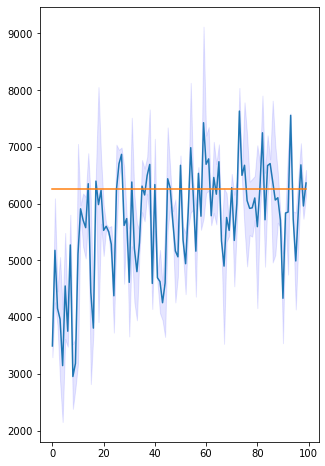

In [8]:
plt.figure(figsize=(5, 8))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

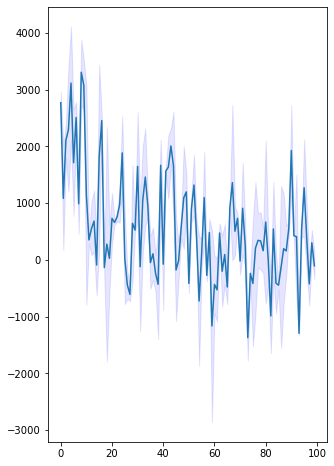

In [9]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)
ucb_stdev_regret = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.fill_between(range(len(ucb_mean_regret)), (ucb_mean_regret-ucb_stdev_regret), (ucb_mean_regret+ucb_stdev_regret), color='b', alpha=.1)
plt.show()

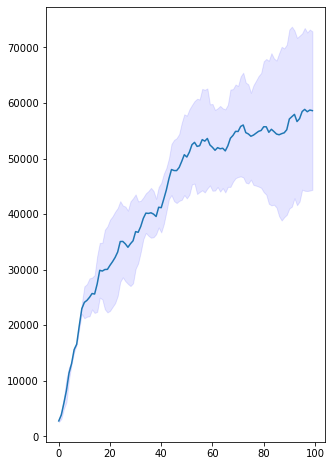

In [10]:
plt.figure(figsize=(5,8))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)
ucb_cum_reg_stdev = np.std(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.fill_between(range(len(ucb_cum_reg_mean)), (ucb_cum_reg_mean-ucb_cum_reg_stdev), (ucb_cum_reg_mean+ucb_cum_reg_stdev), color='b', alpha=.1)

plt.show()

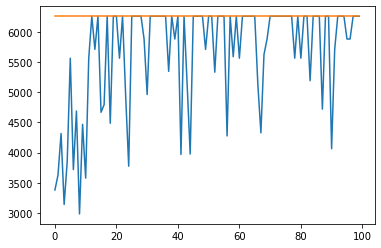

In [11]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [12]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 2, 3]
[2, 0, 0, 3, 0]
[1, 1, 2, 1, 2]
[0, 3, 1, 0, 2]
[2, 3, 1, 1, 2]
[2, 2, 1, 1, 1]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [===                           ] 10.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [======                        ] 20.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [=========                     ] 30.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 3, 1, 

(2, 100)

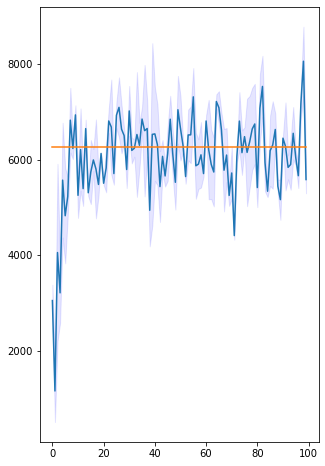

In [13]:
plt.figure(figsize=(5, 8))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

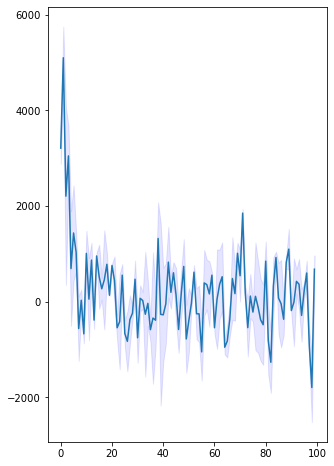

In [14]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)
ts_reg_stdev = np.std(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.fill_between(range(len(ts_mean_regret)), (ts_mean_regret-ts_reg_stdev), (ts_mean_regret+ts_reg_stdev), color='b', alpha=.1)
plt.show()

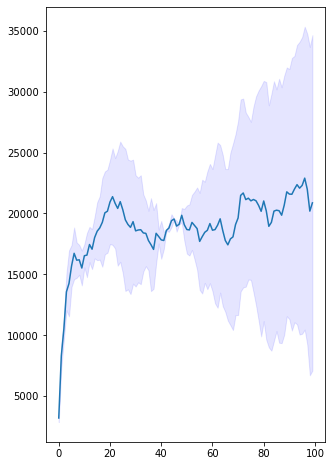

In [15]:
plt.figure(figsize=(5,8))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)
ts_cum_reg_stdev = np.std(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.fill_between(range(len(ts_cum_reg_mean)), (ts_cum_reg_mean-ts_cum_reg_stdev), (ts_cum_reg_mean+ts_cum_reg_stdev), color='b', alpha=.1)
plt.show()

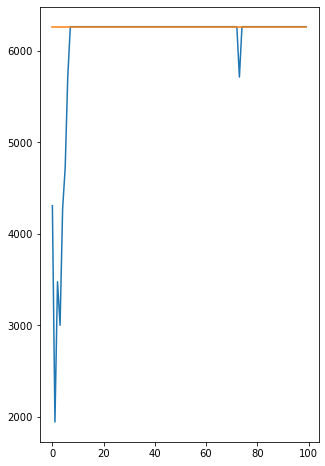

In [16]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.figure(figsize=(5,8))
plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [36]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2])
seen = ts_learner.history_interactions
theoretical_regret = 1024 * np.log(seen)/delta_arms
theoretical_regret

array([ 13.54157744,  15.63960317,  17.39265436,  19.33647352,
        21.24375291,  23.11190321,  24.98940811,  26.87213337,
        28.7489704 ,  30.62704472,  32.50538666,  34.38365333,
        36.26199945,  38.14028494,  40.01858297,  41.89689825,
        43.77520491,  45.65351196,  47.53182136,  49.41013024,
        51.28843876,  53.16674721,  55.0450558 ,  56.92336426,
        58.80167272,  60.67998122,  62.5582897 ,  64.43659819,
        66.31490668,  68.19321517,  70.07152365,  71.94983214,
        73.82814063,  75.70644911,  77.5847576 ,  79.46306609,
        81.34137457,  83.21968306,  85.09799155,  86.97630003,
        88.85460852,  90.73291701,  92.61122549,  94.48953398,
        96.36784247,  98.24615095, 100.12445944, 102.00276793,
       103.88107641, 105.7593849 , 107.63769339, 109.51600187,
       111.39431036, 113.27261885, 115.15092733, 117.02923582,
       118.90754431, 120.78585279, 122.66416128, 124.54246977,
       126.42077825, 128.29908674, 130.17739523, 132.05

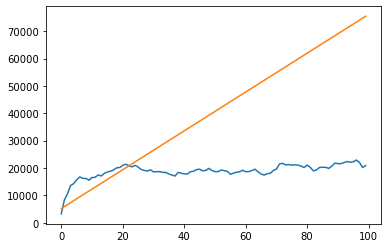

In [35]:
plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()

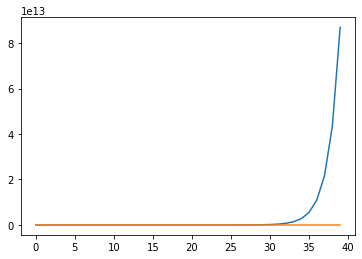

In [31]:
plt.plot(range(len(seen[:40])), seen[:40])
plt.plot(range(len(seen[:40])), np.log(seen[:40]))
plt.show()